<center>
    COMP4600/5500 - Reinforcement Learning

# Homework 5 - Temporal Difference

### Due: Monday, October 18th 11:59 pm
    
</center>

Student Name: ______________________ 

The purpose of this project is to study different properties of Temporal Difference methods.  

In [1]:
# You are allowed to use the following modules
import numpy as np
import matplotlib.pyplot as plt


## Part I
The following Windy Gridworld includes a crosswind running upward through the middle of the grid. The strength of wind is shown under each column that you should use for shifting. The goal is to reach the goal state G from the start state S. This is an undiscounted episodic task, with constant rewards of -1 until the goal state is reached.
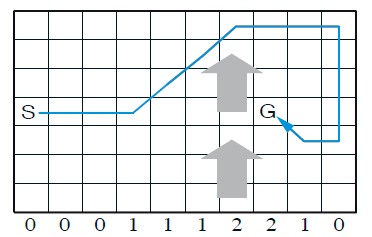


## Part I
Implement SARSA (on-policy TD control) using $\varepsilon$–greedy policy with parameters $\varepsilon=0.1, \alpha=0.5$, and $Q_0 (s,a)=0$ for all $s,a$. Apply your implementation to the windy gridworld in the following scenarios:


**(a)** In this scenario, the agent’s action set includes four moves (i.e. Up, Down, Right, Left). Plot the number of episodes vs. time steps (similar to graph in page 130). Then calculate the average episode length. 

**(b)** In this scenario, the agent has access to King’s moves (eight actions). You need to define a new action set and re-run the experiment in previous scenario. Plot the number of episodes vs. time steps. Then calculate the average episode length.

**(c)** In this scenario, you need to add a ninth action that causes no movement at all other than that caused by the wind. Plot the number of episodes vs. time steps. Then calculate the average episode length.

**(d)** In this scenario, the agent has access to King’s moves (eight actions). Assume that the effect of the wind, if there is any, is stochastic, sometimes varying by 1 from the mean values given for each column. That is, a third of the time you move exactly according to these values, as in the previous part, but also a third of the time you move one cell above that, and another third of the time you move one cell below that. For example, if you are one cell above the goal, one-third of the time you move two cells above the goal, and one-third of the time you move to the goal. Plot the number of episodes vs. time steps. Then calculate the average episode length.

**Note:** all four plots should be shown in one figure for comparison.



In [33]:
def all_states():
    states = []
    
    for height in range(7):
        for widsith in range(10):
            states.append((height,widsith))
    return states

In [34]:
def transition(state, action, num_actions, stochastic_wind):
    windy = [-1,0,1]
    wind = 0

    if state[1] == 3 or state[1] == 4 or state[1] == 5 or state[1] == 8:
        wind = 1

    elif state[1] == 6 or state[1] == 7:
        wind = 2

    if stochastic_wind == 1 and wind != 0:
        wind = np.random.choice(windy) + wind

    #up
    if action == 0:
        y = max(state[0] + wind, state[0] + 1 + wind)

        if y > 6:
            y = 6

        x = state[1]

    #down
    elif action == 1:
        y = min(state[0] + wind, state[0] - 1 + wind)

        if y < 0:
            y = 0

        elif y > 6:
            y = 6

        x = state[1]

    #right
    elif action == 2:
        x = max(state[1], state[1] + 1)

        if x > 9:
            x = 9

        y = state[0]+wind

        if y > 6:
            y = 6

    #left
    elif action == 3:
        x = min(state[1], state[1] - 1)

        if x < 0:
            x = 0

        y = state[0]+wind

        if y > 6:
            y = 6

    if num_actions >= 8:

        #upper right
        if action == 4:
            y = max(state[0] + wind, state[0] + 1 + wind)

            if y > 6:
                y = 6

            x = max(state[1], state[1]+1)

            if x > 9:
                x = 9

        #upper left
        elif action == 5:
            y = max(state[0] + wind, state[0] + 1 + wind)

            if y > 6:
                y = 6

            x = min(state[1], state[1]-1)
            if x < 0:
                x = 0

        #lower right
        elif action == 6:
            y = min(state[0] + wind, state[0] - 1 + wind)

            if y < 0:
                y = 0

            elif y > 6:
                y = 6

            x = max(state[1], state[1] + 1)

            if x > 9:
                x = 9

        #lower left
        elif action == 7:
            y = min(state[0] + wind, state[0] - 1 + wind)

            if y < 0:
                y = 0

            elif y > 6:
                y = 6

            x = min(state[1], state[1] - 1)

            if x < 0:
                x = 0

        if num_actions == 9:

            if action == 8:
                y = state[0]+wind

                if y > 6:
                    y = 6

                x = state[1]

    new_state = (y, x)

    return new_state

In [35]:
def epsilon_greedy(q, state, e, num_actions):
    p = np.random.rand()

    if (p < e):
        next_action = np.random.choice(range(num_actions))

    else:
        next_action = max_q(q, state)

    return next_action

In [116]:
def max_q(q, state):
    max_q = -100000
    max_action = 0
    pick_option = []
    pick_action = []

    for a, q in q[state].items():

        if q >= max_q:
            max_q = q
            max_action = a
            max_val = (max_q, max_action)
            pick_option.append(max_val)

    for i in range(len(pick_option)):

        if pick_option[i][0] == max_q:
            pick_action.append(pick_option[i][1])

    action = np.random.choice(pick_action)
    return action

In [37]:
def sarsa(num_actions, stochastic_wind):
    stochastic_windy = [0,1]
    possible_num_actions = [4,8,9]

    if stochastic_wind not in stochastic_windy:
        return 0

    if num_actions not in possible_num_actions:
        return 0

    e = 0.1
    alpha = 0.5

    states = all_states()

    start = (3, 0)
    terminal = (3, 7)


    total_episodes = []
    
    q = {}
    for s in states:
        q[s] = {}
        for a in range(num_actions):
            q[s][a] = 0
    
    episodes = 0
    timesteps_in_episode = []
    
    while True:

        reward = -1
        s = start
        
        state_history = []
        
        a = epsilon_greedy(q, s, e, num_actions)

        while s != terminal:
            
            next_state = transition(s,a,num_actions,stochastic_wind)
            state_history.append(next_state)

            if next_state == terminal:
                reward = 1

            next_action = epsilon_greedy(q, next_state, e, num_actions)

            q[s][a] += alpha * (reward + q[next_state][next_action] - q[s][a])

            s = next_state
            a = next_action
            total_episodes.append(episodes)
            
            if episodes == 170:
                break

        timesteps_in_episode.append(len(state_history))
        
        if episodes == 170:
            break
            
        episodes += 1
    
    avg_timesteps_episode = sum(timesteps_in_episode)/episodes
    print("Timesteps per Episode:" ,avg_timesteps_episode)
    
    return total_episodes

In [44]:
#4 moves
eps1 = sarsa(4,0)
#8 moves
eps2 = sarsa(8,0)
#9 moves
eps3 = sarsa(9,0)
#8 moves + stochastic wind
eps4 = sarsa(8,1)

Timesteps per Episode: 45.07058823529412
Timesteps per Episode: 31.658823529411766
Timesteps per Episode: 35.22352941176471
Timesteps per Episode: 96.63529411764706


In [45]:
timesteps1 = []

for i in range(len(eps1)):
    timesteps1.append(i)
    i += 1
    
timesteps2 = []

for i in range(len(eps2)):
    timesteps2.append(i)
    i += 1

timesteps3 = []

for i in range(len(eps3)):
    timesteps3.append(i)
    i += 1

timesteps4 = []

for i in range(len(eps4)):
    timesteps4.append(i)
    i += 1

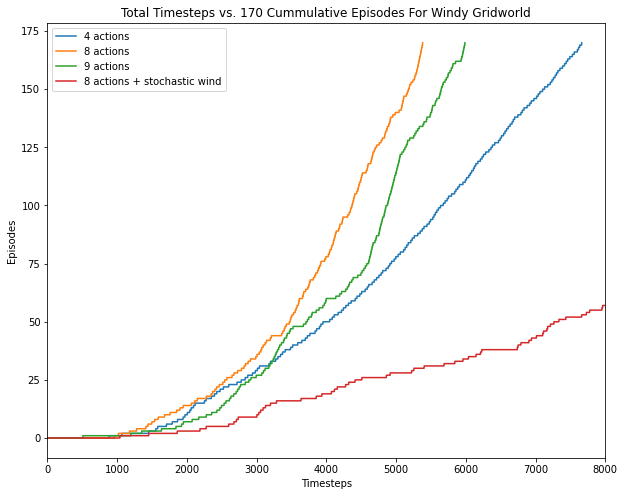

In [46]:
plt.figure(figsize = (10,8))
plt.plot(timesteps1, eps1, label = "4 actions")
plt.plot(timesteps2, eps2, label = "8 actions")
plt.plot(timesteps3, eps3, label = "9 actions")
plt.plot(timesteps4, eps4, label = "8 actions + stochastic wind")
plt.xlabel("Timesteps")
plt.ylabel("Episodes")
plt.title("Total Timesteps vs. 170 Cummulative Episodes For Windy Gridworld")
plt.xlim([0,8000])
plt.legend()
plt.show()

## Part II
Consider the following gridworld with four actions (up, down, right, and left). If the action takes the agent off the gird, the agent stays in the same state. In each non-terminating step, the agent receives a random reward of -12 or +10 with equal probability. The reward for reaching the goal state is +5 and the episode ends when the agent reaches the goal.

Use $\varepsilon$–greedy policy with $\varepsilon(s) = \frac{1}{\sqrt{n(s)}}$ where $n(s)$ is the number of times state $s$ has been visited, assuring infinite exploration in the limit which is a theoretical requirement for the convergence of both **Q-learning** and **Double Q-learning**. 
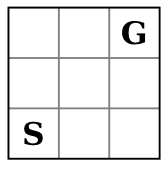

a. Implement **Q-learning** and **Double Q-learning** and apply them to this problem for 10,000 experiments using the learning rate $\alpha=\frac{1}{n(s,a)}$.

b. Plot the average reward per step vs. number of time steps averaged over 10,000 experiments. The length of an episode following the optimal policy is five actions, so the optimal average reward per step is +0.2. Plot this true value in your figure and see how close your algorithm gets to the true value.

c. Plot the maximal action value in the starting state $S$ (i.e. $max_a Q(s,a)$) averaged over 10,000 experiments. The optimal value of maximally valued action in the starting state is $5\gamma^4 - \sum_{k=0}^3 \approx 0.36$. Plot this true value in your figure and see how close your algorithm gets to the true value.

d. Repeat the experiments with $\alpha = \frac{1}{n(s,a)^{0.8}}$ and redo steps b and c.


**Note:** You should have four figures (average rewards and maximal action values for different learning rates, $2 \times 2$). 


In [2]:
# Your code here
def q_all_states():
    states = []
    
    for height in range(3):
        for widsith in range(3):
            states.append((height,widsith))
    return states

In [3]:
def q_transition(state, action):

    #up
    if action == 0:
        y = max(state[0], state[0] + 1)

        if y > 2:
            y = 2

        x = state[1]

    #down
    elif action == 1:
        y = min(state[0], state[0] - 1)

        if y < 0:
            y = 0

        x = state[1]

    #right
    elif action == 2:
        x = max(state[1], state[1] + 1)

        if x > 2:
            x = 2

        y = state[0]


    #left
    elif action == 3:
        x = min(state[1], state[1] - 1)

        if x < 0:
            x = 0

        y = state[0]

    new_state = (y, x)

    return new_state

In [4]:
def q_epsilon_greedy(q, state, e, num_actions):
    p = np.random.rand()

    if (p < e):
        next_action = np.random.choice(range(num_actions))

    else:
        next_action = max_q(q, state)

    return next_action

In [85]:
def q_learning(const):
    
    alpha_val = [0,1]
    
    if const not in alpha_val:
        return 0
    
    num_actions = 4

    states = q_all_states()

    start = (0, 0)
    terminal = (2, 2)

    reward_hist = np.zeros((500, 10000))
    q = {}
    for s in states:
        q[s] = {}
        for a in range(num_actions):
            q[s][a] = 0

    for trials in range(500):
        state = start

        s_visited = {}
        for s in states:
            s_visited[s] = {}
            for visited in range(1):
                s_visited[s][visited] = 0

        for t in range(10000):
            s_visited[state][visited] += 1
            n = s_visited[state][visited]
            e = 1 / n ** 0.5
            
            if const == 0:
                alpha = 1 / n
            elif const == 1:
                alpha = 1 / n ** 0.8
            
            action = q_epsilon_greedy(q, state, e, num_actions)
            next_state = q_transition(state, action)
            if next_state == terminal:
                reward = 5
            else:
                pick_reward = np.random.choice(2)
                if pick_reward == 0:
                    reward = -12
                elif pick_reward == 1:
                    reward = 10

            reward_hist[trials, t] = reward

            if next_state == terminal:
                q[state][action] += alpha * (reward - q[state][action])
                state = start
            else:
                next_action = max_q(q, next_state)
                q[state][action] += alpha * (reward + 0.95*q[next_state][next_action] - q[state][action])
                state = next_state

        avg_rewards = np.mean(reward_hist, axis=0)

    return avg_rewards

In [84]:
q_learn = q_learning(0)
print(q_learn)

[-2.188 -2.452 -0.384 ... -0.57  -1.176 -1.044]


In [87]:
def double_q_learning(const):
    
    alpha_val = [0,1]
    
    if const not in alpha_val:
        return 0
    
    num_actions = 4

    states = q_all_states()

    start = (0, 0)
    terminal = (2, 2)

    reward_hist = np.zeros((500, 10000))
    q1 = {}
    for s in states:
        q1[s] = {}
        for a in range(num_actions):
            q1[s][a] = 0

    q2 = {}
    for s in states:
        q2[s] = {}
        for a in range(num_actions):
            q2[s][a] = 0

    for trials in range(500):
        state = start

        s_visited = {}
        for s in states:
            s_visited[s] = {}
            for visited in range(1):
                s_visited[s][visited] = 0

        for t in range(10000):
            s_visited[state][visited] += 1
            n = s_visited[state][visited]
            e = 1 / n ** 0.5
            
            if const == 0:
                alpha = 1 / n
            elif const == 1:
                alpha = 1 / n ** 0.8

            q_sum = {}
            for s in states:
                q_sum[s] = {}
                for a in range(num_actions):
                    q_sum[s][a] = q1[s][a] + q2[s][a]

            action = q_epsilon_greedy(q_sum, state, e, num_actions)
            next_state = q_transition(state, action)

            if next_state == terminal:
                reward = 5
            else:
                pick_reward = np.random.choice(2)
                if pick_reward == 0:
                    reward = -12
                elif pick_reward == 1:
                    reward = 10

            reward_hist[trials, t] = reward

            max_action_q1 = max_q(q1, next_state)
            max_action_q2 = max_q(q2, next_state)

            if next_state == terminal:
                
                pick_q = np.random.choice(2)
                
                if pick_q == 0:
                    q1[state][action] += alpha * (reward - q1[state][action])
                elif pick_q == 1:
                    q2[state][action] += alpha * (reward - q2[state][action])

                state = start
            else:
                pick_q = np.random.choice(2)

                if pick_q == 0:
                    q1[state][action] += alpha * (reward + 0.95 * q2[next_state][max_action_q1] - q1[state][action])
                elif pick_q == 1:
                    q2[state][action] += alpha * (reward + 0.95 * q1[next_state][max_action_q2] - q2[state][action])
                state = next_state

        avg_rewards = np.mean(reward_hist, axis=0)

    return avg_rewards

In [88]:
double_q_learn = double_q_learning(0)
print(double_q_learn)

[-0.736 -1.132 -0.032 ... -0.136  0.596  0.498]


In [92]:
timesteps_q = []

for i in range(len(double_q_learn)):
    timesteps_q.append(i)
    i += 1

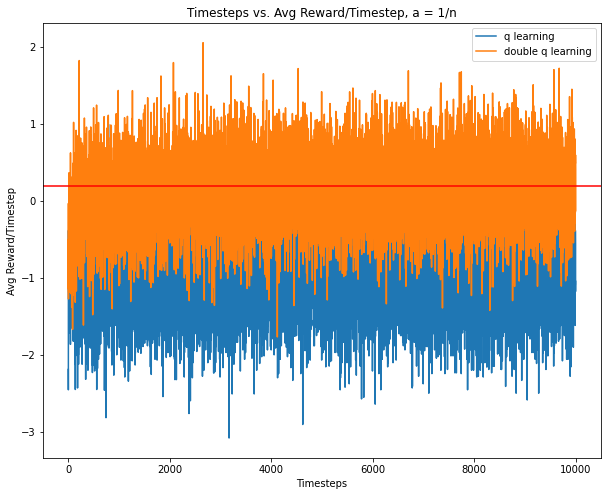

In [93]:
plt.figure(figsize = (10,8))
plt.plot(timesteps_q, q_learn, label = "q learning")
plt.plot(timesteps_q, double_q_learn, label = "double q learning")
plt.axhline(y=0.2, color='r', linestyle='-')
plt.xlabel("Timesteps")
plt.ylabel("Avg Reward/Timestep")
plt.title("Timesteps vs. Avg Reward/Timestep, a = 1/n")
plt.legend()
plt.show()

In [94]:
def max_action_value_q(const):
    
    alpha_val = [0,1]
    
    if const not in alpha_val:
        return 0
    
    num_actions = 4

    states = q_all_states()

    start = (0, 0)
    terminal = (2, 2)

    current_q_max = np.zeros((500, 10000))
    q = {}
    for s in states:
        q[s] = {}
        for a in range(num_actions):
            q[s][a] = 0

    for trials in range(500):
        state = start

        s_visited = {}
        for s in states:
            s_visited[s] = {}
            for visited in range(1):
                s_visited[s][visited] = 0

        for t in range(10000):
            s_visited[state][visited] += 1
            n = s_visited[state][visited]
            e = 1 / n ** 0.5
            
            if const == 0:
                alpha = 1 / n
            elif const == 1:
                alpha = 1 / n ** 0.8
            
            action = q_epsilon_greedy(q, state, e, num_actions)
            next_state = q_transition(state, action)
            if next_state == terminal:
                reward = 5
            else:
                pick_reward = np.random.choice(2)
                if pick_reward == 0:
                    reward = -12
                elif pick_reward == 1:
                    reward = 10
            
            best_state_action = max_q(q, state)
            
            current_q_max[trials, t] = q[state][best_state_action]

            if next_state == terminal:
                q[state][action] += alpha * (reward - q[state][action])
                state = start
            else:
                next_action = max_q(q, next_state)
                q[state][action] += alpha * (reward + 0.95*q[next_state][next_action] - q[state][action])
                state = next_state

        maximal_action = np.mean(current_q_max, axis=0)

    return maximal_action

In [127]:
max_q = max_action_value_q(0)
print(max_q)

[16.63460177 19.09516763 19.54586458 ... 17.69773711 17.69474666
 17.71319336]


In [98]:
def max_action_value_double_q(const):
    
    alpha_val = [0,1]
    
    if const not in alpha_val:
        return 0
    
    num_actions = 4

    states = q_all_states()

    start = (0, 0)
    terminal = (2, 2)

    current_q_max = np.zeros((500, 10000))
    
    q1 = {}
    for s in states:
        q1[s] = {}
        for a in range(num_actions):
            q1[s][a] = 0

    q2 = {}
    for s in states:
        q2[s] = {}
        for a in range(num_actions):
            q2[s][a] = 0

    for trials in range(500):
        state = start

        s_visited = {}
        for s in states:
            s_visited[s] = {}
            for visited in range(1):
                s_visited[s][visited] = 0

        for t in range(10000):
            s_visited[state][visited] += 1
            n = s_visited[state][visited]
            e = 1 / n ** 0.5
            
            if const == 0:
                alpha = 1 / n
            elif const == 1:
                alpha = 1 / n ** 0.8

            q_sum = {}
            for s in states:
                q_sum[s] = {}
                for a in range(num_actions):
                    q_sum[s][a] = q1[s][a] + q2[s][a]

            action = q_epsilon_greedy(q_sum, state, e, num_actions)
            next_state = q_transition(state, action)

            if next_state == terminal:
                reward = 5
            else:
                pick_reward = np.random.choice(2)
                if pick_reward == 0:
                    reward = -12
                elif pick_reward == 1:
                    reward = 10
            
            best_state_action_q1 = max_q(q1, state)
            best_state_action_q2 = max_q(q2, state)
            
            q1_state = q1[state][best_state_action_q1]
            q2_state = q2[state][best_state_action_q2]
            
            best_q = max(q1_state, q2_state)
            
            current_q_max[trials, t] = best_q

            max_action_q1 = max_q(q1, next_state)
            max_action_q2 = max_q(q2, next_state)

            if next_state == terminal:
                
                pick_q = np.random.choice(2)
                
                if pick_q == 0:
                    q1[state][action] += alpha * (reward - q1[state][action])
                elif pick_q == 1:
                    q2[state][action] += alpha * (reward - q2[state][action])

                state = start
            else:
                pick_q = np.random.choice(2)

                if pick_q == 0:
                    q1[state][action] += alpha * (reward + 0.95 * q2[next_state][max_action_q1] - q1[state][action])
                elif pick_q == 1:
                    q2[state][action] += alpha * (reward + 0.95 * q1[next_state][max_action_q2] - q2[state][action])
                state = next_state

        maximal_action = np.mean(current_q_max, axis=0)

    return maximal_action

In [101]:
max_double_q = max_action_value_double_q(0)
print(max_double_q)

[-2.37782633  0.81791969  2.33715373 ...  2.03148722  1.97645284
  1.72758378]


In [107]:
timesteps_max_q= []

for i in range(len(max_double_q)):
    timesteps_max_q.append(i)
    i += 1

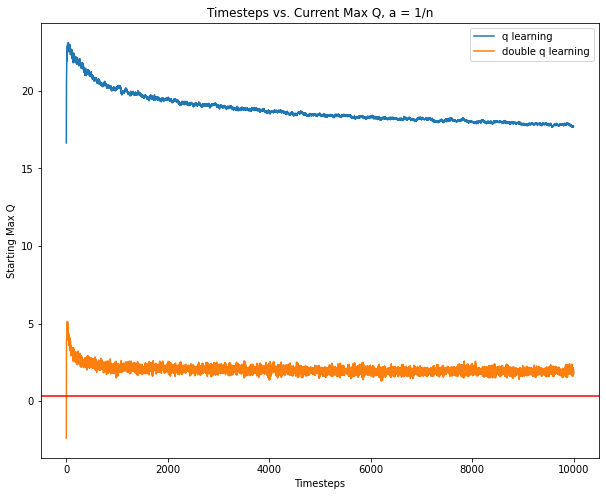

In [128]:
plt.figure(figsize = (10,8))
plt.plot(timesteps_max_q, max_q, label = "q learning")
plt.plot(timesteps_max_q, max_double_q, label = "double q learning")
plt.axhline(y=0.36, color='r', linestyle='-')
plt.xlabel("Timesteps")
plt.ylabel("Starting Max Q")
plt.title("Timesteps vs. Current Max Q, a = 1/n")
plt.legend()
plt.show()

In [117]:
q_learn2 = q_learning(1)
print(q_learn2)

[-0.56  -1.132 -1.44  ...  0.154  0.134  0.946]


In [118]:
double_q_learn2 = double_q_learning(1)
print(double_q_learn2)

[-1.132 -0.604 -1.748 ...  0.992  0.766  0.328]


In [120]:
max_q2 = max_action_value_q(1)
print(max_q2)

[2.46096811 5.42623996 5.99950493 ... 3.68315568 3.73626432 3.71133727]


In [121]:
max_double_q2 = max_action_value_double_q(1)
print(max_double_q2)

[-1.41030841  1.6250419   2.70982946 ...  2.41445645  2.15321251
  2.23385639]


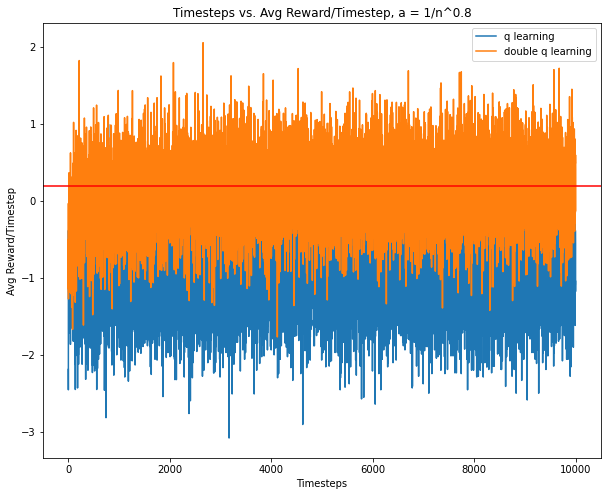

In [119]:
plt.figure(figsize = (10,8))
plt.plot(timesteps_q, q_learn, label = "q learning")
plt.plot(timesteps_q, double_q_learn, label = "double q learning")
plt.axhline(y=0.2, color='r', linestyle='-')
plt.xlabel("Timesteps")
plt.ylabel("Avg Reward/Timestep")
plt.title("Timesteps vs. Avg Reward/Timestep, a = 1/n^0.8")
plt.legend()
plt.show()

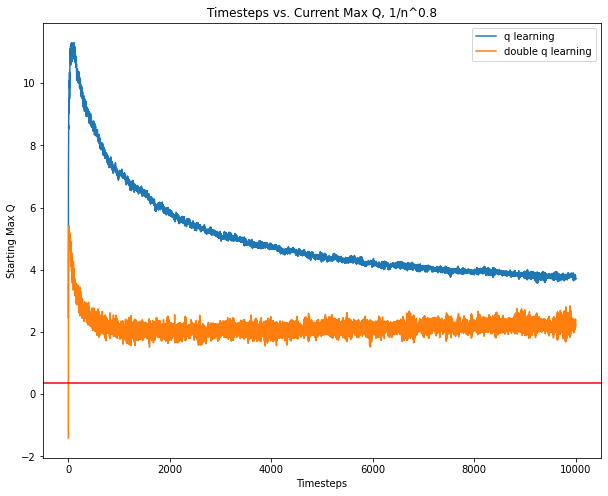

In [123]:
plt.figure(figsize = (10,8))
plt.plot(timesteps_max_q, max_q2, label = "q learning")
plt.plot(timesteps_max_q, max_double_q2, label = "double q learning")
plt.axhline(y=0.36, color='r', linestyle='-')
plt.xlabel("Timesteps")
plt.ylabel("Starting Max Q")
plt.title("Timesteps vs. Current Max Q, 1/n^0.8")
plt.legend()
plt.show()

Answer the following questions:

a.	Which algorithm finds a better policy? Why?
> Answer: 
    Double Q learning finds a better policy since it is unaffected by the maximization bias. This is due to having 2 Qs to which it can update, therefore it will find the better policy faster.

b.	b.	Which learning rate performs better? 
> Answer:
    Q learning performs better since it has higher overall Q values, since double Q learning is dividing the Q values between 2 Q values, having only 1 Q value is more accurate and will overall give higher max Q values